In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout, Flatten
from keras.callbacks import EarlyStopping

### Load the Fashion_Mnist dataset

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
# 28 x 28 images
X_train_full.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

### Create validation set from training set

In [5]:
X_valid = X_train_full[:5000]
X_train = X_train_full[5000:]

y_valid = y_train_full[:5000]
y_train = y_train_full[5000:]

X_test = X_test 

### Do some exploration of images in the dataset

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

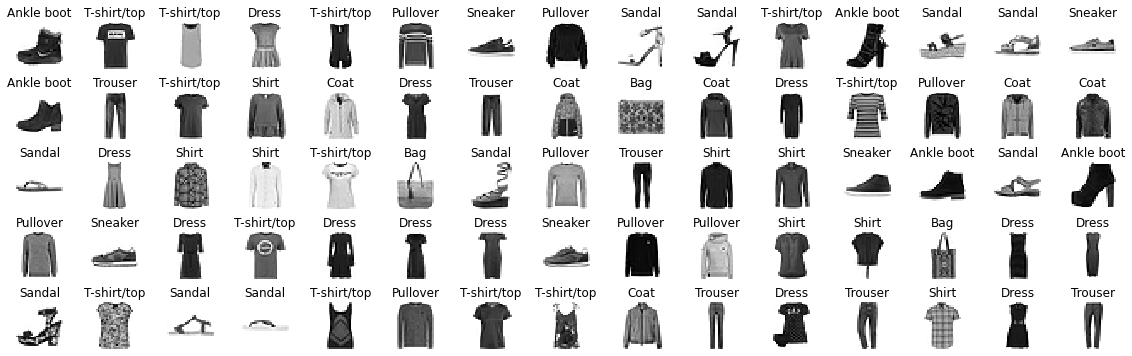

In [7]:
# Plot first 75 images
n_rows = 5
n_cols = 15
plt.figure(figsize=(20,6))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train_full[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train_full[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

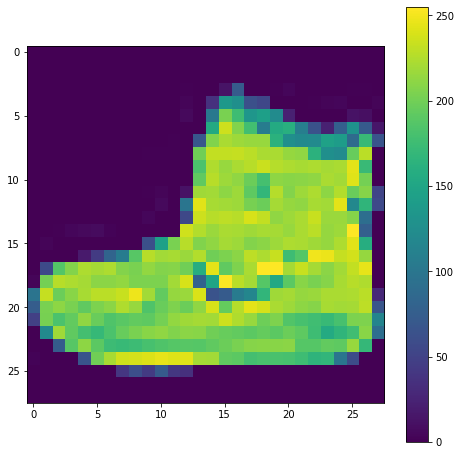

In [8]:
# Check example pixel values
plt.figure(figsize=(8,8))
plt.imshow(X_train_full[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
class_names[y_train_full[0]]

'Ankle boot'

### Create Model to train

In [10]:
# Create Sequential MLP
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')  # softmax because classes are exclusive
])
# I tried adding dropout layers, accuracy decreased

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


### Explore the 1st dense layer

In [12]:
model.layers

In [13]:
hidden2 = model.layers[2]
hidden2.name

'dense_1'

In [14]:
weights, biases = hidden2.get_weights()
weights

array([[-0.01887281,  0.00842043,  0.01038081, ..., -0.11029342,
        -0.08305515,  0.04821264],
       [ 0.00726936,  0.01018655, -0.07696047, ...,  0.0011645 ,
         0.09766828, -0.10874841],
       [-0.11147872,  0.01225663, -0.0577541 , ...,  0.06661148,
        -0.057922  ,  0.11097591],
       ...,
       [-0.01349525,  0.0174781 , -0.03397065, ...,  0.05289396,
         0.08335356, -0.08403575],
       [-0.04584827,  0.08629016,  0.11994513, ..., -0.07395755,
        -0.04206431, -0.0141114 ],
       [ 0.08755731, -0.02576006, -0.05725028, ...,  0.05844299,
        -0.07952368,  0.05351269]], dtype=float32)

In [15]:
weights.shape

(300, 100)

In [16]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [17]:
biases.shape

(100,)

### Compile the model

In [18]:
model.compile(loss='sparse_categorical_crossentropy',   # SCC because sparse labels (Each class is exclusive)
             optimizer='adam',
             metrics=['accuracy'])

### Fit the model

In [19]:
fitted_model = model.fit(X_train, y_train, epochs=50,
                        validation_data = (X_valid, y_valid),
                        callbacks=[EarlyStopping(patience=15)])

Epoch 1/50
1719/1719 [==============================] - 2s 897us/step - loss: 2.2235 - accuracy: 0.6658 - val_loss: 0.7324 - val_accuracy: 0.7088
Epoch 2/50
1719/1719 [==============================] - 1s 775us/step - loss: 0.7014 - accuracy: 0.7185 - val_loss: 0.7063 - val_accuracy: 0.7208
Epoch 3/50
1719/1719 [==============================] - 1s 780us/step - loss: 0.6293 - accuracy: 0.7454 - val_loss: 0.5859 - val_accuracy: 0.7874
Epoch 4/50
1719/1719 [==============================] - 1s 777us/step - loss: 0.5112 - accuracy: 0.8130 - val_loss: 0.4960 - val_accuracy: 0.8282
Epoch 5/50
1719/1719 [==============================] - 2s 889us/step - loss: 0.4543 - accuracy: 0.8379 - val_loss: 0.4140 - val_accuracy: 0.8578
Epoch 6/50
1719/1719 [==============================] - 2s 942us/step - loss: 0.4232 - accuracy: 0.8494 - val_loss: 0.4357 - val_accuracy: 0.8538
Epoch 7/50
1719/1719 [==============================] - 1s 792us/step - loss: 0.3990 - accuracy: 0.8578 - val_loss: 0.4199 -

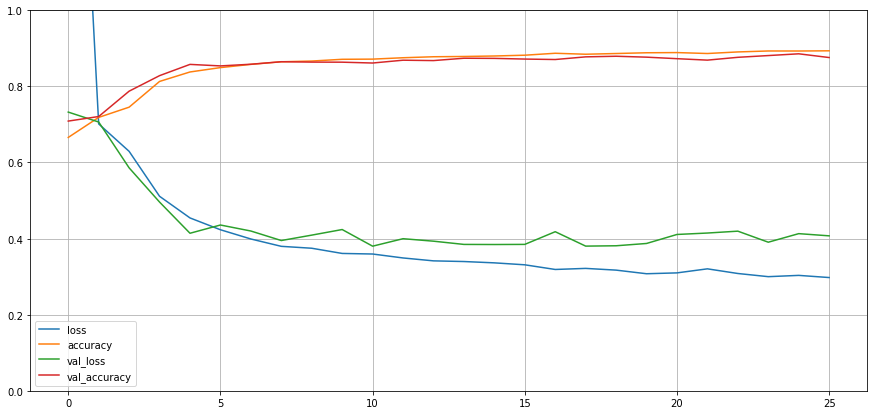

In [20]:
# Graph metrics over epochs
pd.DataFrame(fitted_model.history).plot(figsize=(15,7))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

### Try using SGD optimizer with scaled features and compare against adam/unscaled features

In [21]:
# Create Validation Set and scale data since using SGD as 
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

# Create Sequential MLP
model2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')  # softmax because classes are exclusive
])
# I tried adding dropout layers, accuracy decreased

#Compile Model using SGD for optimizer
model2.compile(loss='sparse_categorical_crossentropy',   # SCC because sparse labels (Each class is exclusive)
             optimizer='sgd',
             metrics=['accuracy'])

#Fit model
fitted_model2 = model2.fit(X_train, y_train, epochs=50,
                        validation_data = (X_valid, y_valid),
                        callbacks=[EarlyStopping(patience=15)])

Epoch 1/50
1719/1719 [==============================] - 1s 734us/step - loss: 0.7171 - accuracy: 0.7615 - val_loss: 0.5143 - val_accuracy: 0.8280
Epoch 2/50
1719/1719 [==============================] - 1s 683us/step - loss: 0.4853 - accuracy: 0.8319 - val_loss: 0.4424 - val_accuracy: 0.8516
Epoch 3/50
1719/1719 [==============================] - 1s 682us/step - loss: 0.4395 - accuracy: 0.8459 - val_loss: 0.4497 - val_accuracy: 0.8372
Epoch 4/50
1719/1719 [==============================] - 1s 677us/step - loss: 0.4141 - accuracy: 0.8550 - val_loss: 0.4111 - val_accuracy: 0.8584
Epoch 5/50
1719/1719 [==============================] - 1s 684us/step - loss: 0.3942 - accuracy: 0.8616 - val_loss: 0.3898 - val_accuracy: 0.8658
Epoch 6/50
1719/1719 [==============================] - 1s 681us/step - loss: 0.3791 - accuracy: 0.8665 - val_loss: 0.3833 - val_accuracy: 0.8696
Epoch 7/50
1719/1719 [==============================] - 1s 684us/step - loss: 0.3656 - accuracy: 0.8703 - val_loss: 0.3614 -

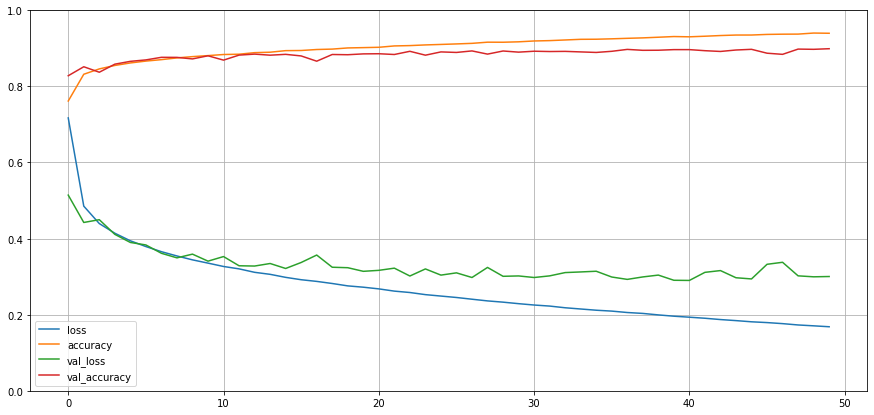

In [22]:
# Graph metrics over epochs
pd.DataFrame(fitted_model2.history).plot(figsize=(15,7))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [23]:
# Evaluate model on the test
model2.evaluate(X_test, y_test)

313/313 [==============================] - 0s 437us/step - loss: 0.3365 - accuracy: 0.8872


[0.3364545702934265, 0.8871999979019165]

In [24]:
fitted_model2.params

{'verbose': 1, 'epochs': 50, 'steps': 1719}

### Make predicitons using the scaled features with sgd model

In [25]:
X_new = X_test[:5]

In [26]:
y_proba = model2.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.09, 0.  , 0.  , 0.  , 0.  , 0.  , 0.91, 0.  , 0.  , 0.  ]],
      dtype=float32)

In [27]:
y_pred = model2.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1, 1, 6], dtype=int64)

In [28]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt'],
      dtype='<U11')

In [29]:
y_new = y_test[:5]
y_new

array([9, 2, 1, 1, 6], dtype=uint8)

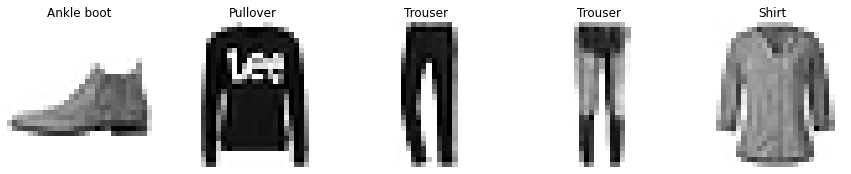

In [30]:
plt.figure(figsize=(15, 3))
for index, image in enumerate(X_new):
    plt.subplot(1, 5, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()